## Importing Libraries 

In [40]:
import os
import numpy as np
import pandas as pd
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [41]:
def get_file_header(file_path,n_bytes=10):
    #Read first n_bytes of a file and return a list of integers
    with open(file_path,"rb") as f:
        header=f.read(n_bytes)
        return list(header)

In [42]:
def prepare_dataset(base_dir="dataset", n_bytes=10):
    X, y = [], []
    for file_type in os.listdir(base_dir):
        folder = os.path.join(base_dir, file_type)
        if os.path.isdir(folder) and not file_type.startswith('.'):  # ignore hidden folders
            print("Found folder:", folder)
            for filename in os.listdir(folder):
                if filename.startswith('.'):  # ignore hidden files like .ipynb_checkpoints
                    continue
                print("Found file:", filename)
                file_path = os.path.join(folder, filename)
                header = get_file_header(file_path, n_bytes)
                if len(header) < n_bytes:
                    continue
                X.append(header)
                y.append(file_type)
    print("X length:", len(X))
    print("y length:", len(y))
    return np.array(X), np.array(y)


In [43]:
X, y = prepare_dataset("dataset")
print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")
print(f"File types found: {np.unique(y)}")
print("First file header:", X[0])
print("Label:", y[0])


Found folder: dataset\jpeg
Found file: 014846534b3c5b8c23878b972ea101a6.jpg
Found file: 015ebc35cb00ce65719a314de1c80949.jpg
Found file: 132c33138527a3a8168fce6b9b8a25a7.jpg
Found file: 369c97b15fd39a876df97a50c10c5d51.jpg
Found file: 97b05ff877be9301fa062f028a63637c.jpg
Found file: 9c332b7d851f5415424102c10d4ce9e0.jpg
Found file: d9d7af6859b20d023829db734d6d8777.jpg
Found file: e267ce2eb457a6c03bf539a1da05fbb3.jpg
Found folder: dataset\pdf
Found file: BAECH Pogramme Guide.pdf
Found file: BLOCK1.pdf
Found file: IE-Delhi 25-09.pdf
Found file: IIIT Pune_Interns_0.pdf
Found file: s13104-019-4812-0.pdf
Found file: Unit 2 Database Design.pptx.pdf
Found file: Unit 4 Chapter 2 Transaction Management(old).pptx.pdf
Found file: Unit-1.pdf
Found folder: dataset\png
Found file: Screenshot (17).png
Found file: Screenshot (18).png
Found file: Screenshot (21).png
Found file: Screenshot (23).png
Found file: Screenshot (24).png
Found file: Screenshot (27).png
Found file: Screenshot (28).png
Found file:

In [44]:
# split dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
#craete Random Forest Model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred=model.predict(X_test)

In [47]:
print("Classification Report:\n")
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

        jpeg       1.00      1.00      1.00         1
         pdf       1.00      1.00      1.00         3
         png       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



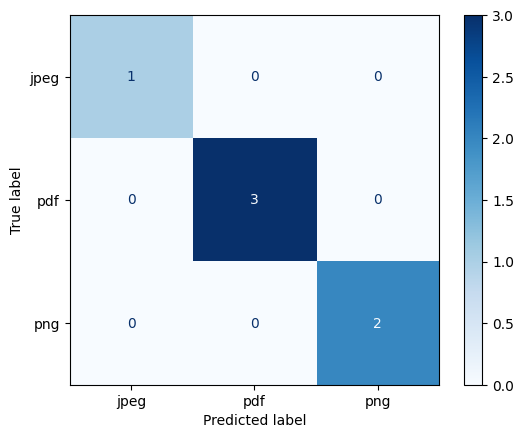

In [48]:
cm=confusion_matrix(y_test,y_pred,labels=np.unique(y))
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()